Трета лабораториска вежба по предметот Податочно рударство

Изработиле: Јана Митровска (181080) и Бојан Петрушевски (162012)

Тема: Баесови мрежи

# **Reading the dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from graphviz import *
from pomegranate import *
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv('/content/drive/MyDrive/netflix.csv')

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


# **Building the dataset**

In [ ]:
data_encoded = data.apply(LabelEncoder().fit_transform)

In [ ]:
data_encoded.head()

In [ ]:
X = data_encoded.drop(['type'], axis = 1)
Y = data_encoded.type.values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# **Gaussian Model**

In [ ]:
model = GaussianNB()
model.fit(X_train, Y_train.squeeze())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
result_data = pd.DataFrame({"actual":Y_test, "predicted":predicted})

In [ ]:
result_data

,actual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,0
...,...,...
1942,1,1
1943,0,0
1944,0,0
1945,0,0


In [ ]:
#1310 вредности биле 0 и се предвиделе како 0, а 21 вредности биле 1 и се предвиделе како 0
#616 вредности биле 1 и се предвиделе како 1, а 0 вредности биле 1 и се предвиделе како 0
confusion_matrix = pd.crosstab(result_data['actual'], result_data['predicted'], rownames={'Actual'},
                               colnames=['Predicted'])
print(confusion_matrix) 

Predicted     0    1
Actual              
0          1310    0
1            21  616


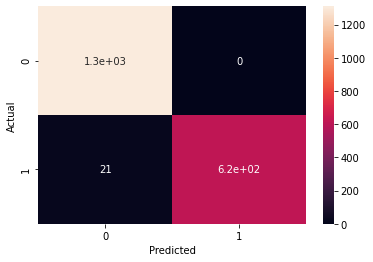

In [ ]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

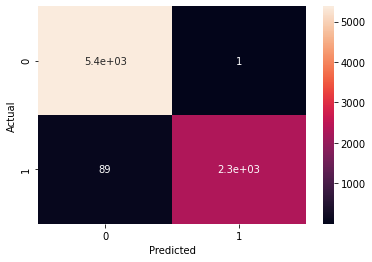

In [ ]:
#Обезбедува  тренирање/тестирање на индекси, за да се раздели датата во тренирани/тестирани множества.
#Секој примерок се користи еднаш како тест множество додека останатиот дел го формираат тренираното множество.

loo = LeaveOneOut()

X = data_encoded.drop(['type'], axis = 1).to_numpy()
Y = data_encoded.type.to_numpy()

predicted = []
actual = []

for train_index, test_index in loo.split(X):
  trainX, testX = X[train_index], X[test_index]
  trainY, testY = Y[train_index], Y[test_index]

  model.fit(X_train, Y_train.squeeze())
  predicted_value = model.predict(testX)
  predicted.append(predicted_value[0])
  actual.append(testY[0])

print(predicted)
print(actual)

result_data = pd.DataFrame({"actual":actual, "predicted":predicted})
conf_matrix = pd.crosstab(result_data['actual'], result_data['predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)
plt.show()

In [ ]:
#Accuracy score - oваа метрика пресметува точност на подмножество. 
#Резултатот од тестот е 0.9884 од максимална вредност 1. 
#Precision score - oваа метрика покажува просечна точност на предвидениот резултат. 
#Резултатот од тестот е 0.999 од максимална вредност 1. 
#Recall score - oваа метрика го споредува односот помеѓу точните позитивни и лажните негативни. Со помош на оваа формула се пресметува tp / (tp + fn).
#Резултатот од тестот е 0.9630 од максимална вредност 1. 
#F1 score - Резултатот Ф1 може да се толкува како пондериран просек на прецизност и отповикување.
#Резултатот од тестот е 0.9809 од максимална вредност 1. 
print (f"accuracy: {accuracy_score(actual,predicted)}\nprecision: {precision_score(actual, predicted)}\nrecall: {recall_score(actual, predicted)}\nf1: {f1_score(actual, predicted)}")

accuracy: 0.9884422755875176
precision: 0.9995693367786391
recall: 0.9630705394190872
f1: 0.9809805579036349


In [ ]:
scores = cross_validate(model, X, Y, cv=5, scoring="f1_macro")
scores

{'fit_time': array([0.00474763, 0.002599  , 0.00255156, 0.00248194, 0.0026474 ]),
 'score_time': array([0.00157189, 0.00137544, 0.00135803, 0.0013895 , 0.00165057]),
 'test_score': array([0.98480273, 0.98939982, 0.98939683, 0.97630911, 0.99092227])}

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

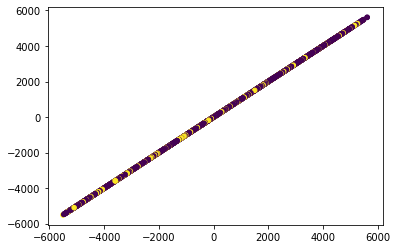

In [ ]:
#Крива која ја покажува прецизноста на Guassian Model
plt.scatter(X_pca[:,0], X_pca[:, :1], c=Y, s=20)

# **Bayesian Network**

In [6]:
BNData = data[['type', 'country', 'director','release_year']].copy()

In [7]:
model = BayesianNetwork.from_samples(BNData.to_numpy(), state_names= BNData.columns.values, algorithm='chow-liu')

In [8]:
BNData.head()

,type,country,director,release_year
0,TV Show,Brazil,Unknown,2020
1,Movie,Mexico,Jorge Michel Grau,2016
2,Movie,Singapore,Gilbert Chan,2011
3,Movie,United States,Shane Acker,2009
4,Movie,United States,Robert Luketic,2008


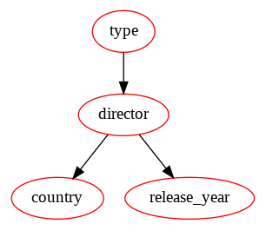

In [13]:
#plot() функцијата се користи за да се создаде 2D шестоаголна парцела за обложување со точки во x и y.
#X и Y се параметрите на хоризонталните и вертикалните координати на податочните точки. 
model.plot()

In [ ]:
#sample() е вградена функција на рандом модул во Python што враќа конкретна должина на листа од елементи од некоја секвенца.
model.sample()

array([['TV Show', 'United States', 'Unknown', '2020']], dtype='<U21')

In [ ]:
#predict(некои вредности) предвидува од предходно зададени периметри , вредности на  даден сет на податоци.
model.predict([['TV Show','France',None,None]])

[array(['TV Show', 'France', 'Unknown', 2020], dtype=object)]